In [17]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from tensorflow.keras import models, layers
from tensorflow.keras.saving import save_model

from keras import Model
from keras.optimizers import Adam, SGD, Nadam
from keras.models import load_model
from keras.callbacks import EarlyStopping, TensorBoard
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix, precision_recall_curve
from utils.utils import plot_line, plot_metrics, plot_confusion_matrix

In [3]:
import keras
keras.__version__

'2.12.0'

In [4]:
data_dir = '..\dataset'
classes = ('REAL', 'FAKE')

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_images = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    subset="training",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

val_images = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    subset="validation",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_images = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 80000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [7]:
def create_model(dilation = 2):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), dilation_rate=dilation, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Conv2D(64, (3, 3), dilation_rate=dilation, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Conv2D(128, (3, 3), dilation_rate=dilation, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [8]:
callback = EarlyStopping(monitor='val_loss', patience=3)

In [10]:
model = create_model()
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(train_images, epochs=100, validation_data=val_images, callbacks=[callback])

Epoch 1/100
2500/2500 [==============================] - 342s 136ms/step - loss: 0.4442 - accuracy: 0.7928 - val_loss: 0.3479 - val_accuracy: 0.8523
Epoch 2/100
2500/2500 [==============================] - 243s 97ms/step - loss: 0.3361 - accuracy: 0.8569 - val_loss: 0.2952 - val_accuracy: 0.8803
Epoch 3/100
2500/2500 [==============================] - 244s 97ms/step - loss: 0.2949 - accuracy: 0.8788 - val_loss: 0.2637 - val_accuracy: 0.8914
Epoch 4/100
2500/2500 [==============================] - 243s 97ms/step - loss: 0.2785 - accuracy: 0.8856 - val_loss: 0.2431 - val_accuracy: 0.9026
Epoch 5/100
2500/2500 [==============================] - 240s 96ms/step - loss: 0.2657 - accuracy: 0.8924 - val_loss: 0.3179 - val_accuracy: 0.8674
Epoch 6/100
2500/2500 [==============================] - 242s 97ms/step - loss: 0.2591 - accuracy: 0.8935 - val_loss: 0.2661 - val_accuracy: 0.8867
Epoch 7/100
2500/2500 [==============================] - 245s 98ms/step - loss: 0.2524 - accuracy: 0.8975 - val

In [12]:
save_model(model, '../models/DILATED')
loaded_model = load_model('../models/DILATED')

INFO:tensorflow:Assets written to: ../models/DILATED\assets


INFO:tensorflow:Assets written to: ../models/DILATED\assets


In [13]:
hist_df = pd.DataFrame(history.history)
hist_df.columns = ['train_loss', 'train_acc', 'validation_loss', 'validation_acc']
hist_df.index = hist_df.index + 1
hist_df.to_csv('../history/DILATED.csv')

In [14]:
loss, accuracy = model.evaluate(test_images)

625/625 [==============================] - 24s 39ms/step - loss: 0.2150 - accuracy: 0.9165


In [16]:
dilation_2_model = create_model(3)
optimizer = Adam(learning_rate=0.001)
dilation_2_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history2 = dilation_2_model.fit(train_images, epochs=100, validation_data=val_images, callbacks=[callback])

Epoch 1/100
2500/2500 [==============================] - 315s 126ms/step - loss: 0.4737 - accuracy: 0.7732 - val_loss: 0.3970 - val_accuracy: 0.8201
Epoch 2/100
2500/2500 [==============================] - 216s 86ms/step - loss: 0.3670 - accuracy: 0.8390 - val_loss: 0.3636 - val_accuracy: 0.8422
Epoch 3/100
2500/2500 [==============================] - 219s 88ms/step - loss: 0.3379 - accuracy: 0.8546 - val_loss: 0.3064 - val_accuracy: 0.8701
Epoch 4/100
2500/2500 [==============================] - 217s 87ms/step - loss: 0.3234 - accuracy: 0.8611 - val_loss: 0.3141 - val_accuracy: 0.8640
Epoch 5/100
2500/2500 [==============================] - 214s 85ms/step - loss: 0.3092 - accuracy: 0.8684 - val_loss: 0.2923 - val_accuracy: 0.8759
Epoch 6/100
2500/2500 [==============================] - 212s 85ms/step - loss: 0.3056 - accuracy: 0.8704 - val_loss: 0.3097 - val_accuracy: 0.8662
Epoch 7/100
2500/2500 [==============================] - 215s 86ms/step - loss: 0.2993 - accuracy: 0.8742 - val

In [18]:
dilation_model_2 = create_model(2)
optimizer = Nadam(learning_rate=0.001)
dilation_model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history3 = dilation_model_2.fit(train_images, epochs=100, validation_data=val_images, callbacks=[callback])

Epoch 1/100
2500/2500 [==============================] - 357s 142ms/step - loss: 0.4274 - accuracy: 0.8044 - val_loss: 0.3378 - val_accuracy: 0.8554
Epoch 2/100
2500/2500 [==============================] - 242s 97ms/step - loss: 0.3230 - accuracy: 0.8629 - val_loss: 0.2784 - val_accuracy: 0.8859
Epoch 3/100
2500/2500 [==============================] - 243s 97ms/step - loss: 0.2925 - accuracy: 0.8790 - val_loss: 0.2881 - val_accuracy: 0.8777
Epoch 4/100
2500/2500 [==============================] - 242s 97ms/step - loss: 0.2735 - accuracy: 0.8869 - val_loss: 0.2920 - val_accuracy: 0.8819
Epoch 5/100
2500/2500 [==============================] - 250s 100ms/step - loss: 0.2607 - accuracy: 0.8945 - val_loss: 0.2383 - val_accuracy: 0.9031
Epoch 6/100
2500/2500 [==============================] - 251s 101ms/step - loss: 0.2525 - accuracy: 0.8981 - val_loss: 0.2339 - val_accuracy: 0.9057
Epoch 7/100
2500/2500 [==============================] - 247s 99ms/step - loss: 0.2447 - accuracy: 0.9023 - v

In [19]:
loss, accuracy = dilation_model_2.evaluate(test_images)

625/625 [==============================] - 164s 263ms/step - loss: 0.1823 - accuracy: 0.9298


In [20]:
print(f"Loss : {loss}")
print(f"Accuracy : {accuracy}")

Loss : 0.1823403388261795
Accuracy : 0.9297500252723694


In [21]:
save_model(dilation_model_2, '../models/DILATED_NADAM')
loaded_model = load_model('../models/DILATED_NADAM')

INFO:tensorflow:Assets written to: ../models/DILATED_NADAM\assets


INFO:tensorflow:Assets written to: ../models/DILATED_NADAM\assets


In [22]:
hist_df2 = pd.DataFrame(history3.history)
hist_df2.columns = ['train_loss', 'train_acc', 'validation_loss', 'validation_acc']
hist_df2.index = hist_df2.index + 1
hist_df2.to_csv('../history/DILATED_NADAM.csv')

In [23]:
y_true = []
y_pred = []
for batch_id in range(len(test_images)):
    batch_images = test_images[batch_id][0]
    batch_labels = test_images[batch_id][1]
    batch_predictions = loaded_model.predict(batch_images)
    batch_predictions = (batch_predictions > 0.5).astype(int)
    y_true.extend(batch_labels)
    y_pred.extend(batch_predictions)

1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 39ms/step


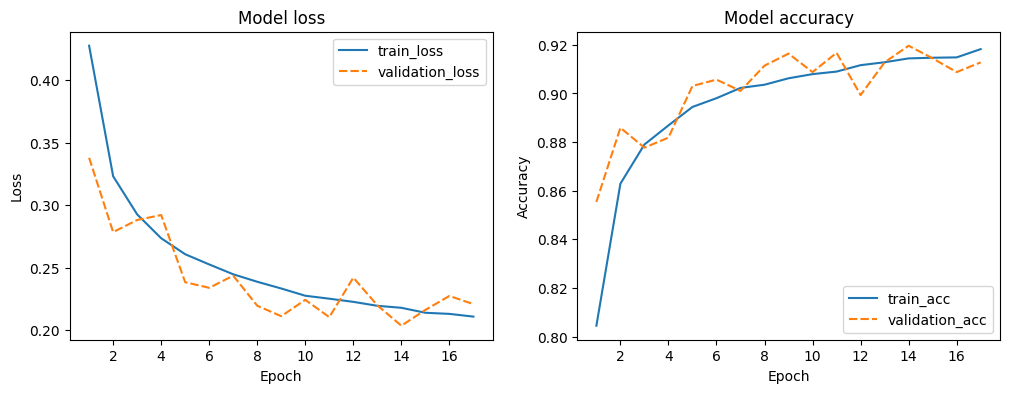

In [24]:
plot_line(hist_df2)

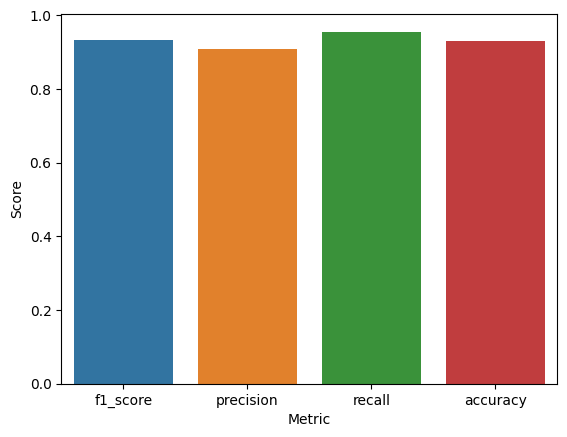

In [25]:
plot_metrics(y_true, y_pred)

In [26]:
# Calculate f1 score, precision and recall
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)

# Print the metrics
print('The f1 score on the test images is:', f1)
print('The precision on the test images is:', prec)
print('The recall on the test images is:', rec)
print('The accuracy score on the test images is:', acc)

The f1 score on the test images is: 0.931520202758688
The precision on the test images is: 0.908624132357136
The recall on the test images is: 0.9556
The accuracy score on the test images is: 0.92975


In [18]:
# Calculate metrics
f1 = f1_score(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
cm = confusion_matrix(y_true, y_pred)

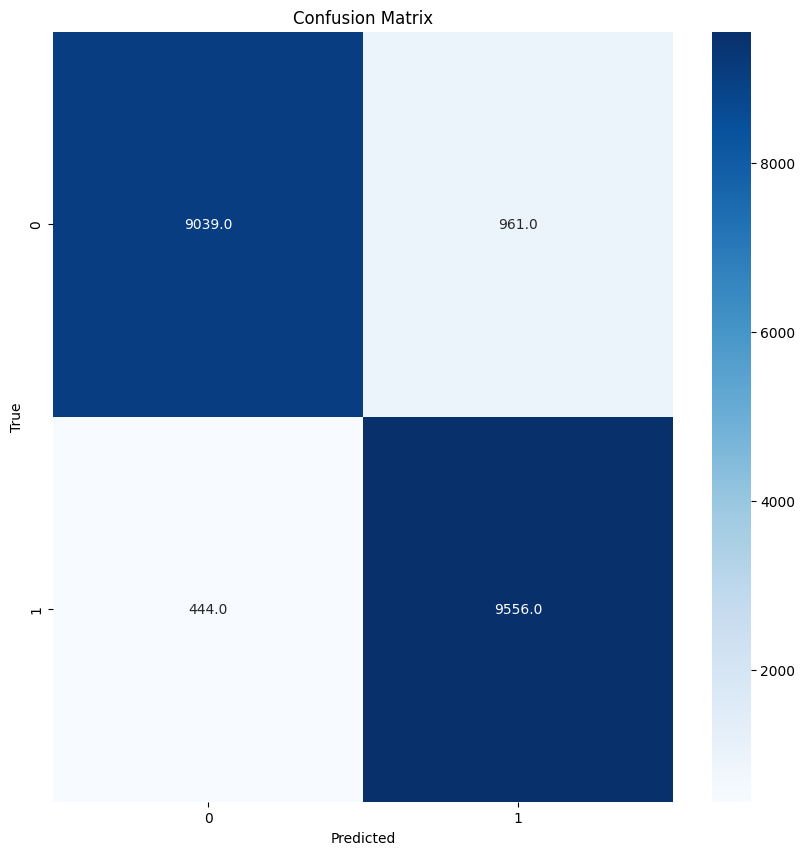

In [27]:
plot_confusion_matrix(y_true, y_pred)

In [27]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:
algorithms = [
    KNeighborsClassifier(),
    SVC()
]

In [29]:
accuracies = []
for algorithm in algorithms:
    ml_model = algorithm.fit(x_train, y_train)
    ml_scores = model_selection.cross_val_score(ml_model, x_val, y_val, cv=5)
    accuracies.append(np.mean(ml_scores))

In [30]:
print("Accuracies:", accuracies)

Accuracies: [0.8938, 0.9065000000000001]
